In [5]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [6]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [7]:
yearfile='MERRA2_2017_tavg1_2d_rad_Nx_M2T1NXRAD_ctio_AllYear.csv'

In [8]:
df_year=pd.read_csv(yearfile)

In [9]:
df_year.describe()

,TAUHGH,TAULOW,TAUMID,TAUTOT
count,1464.000000,1464.000000,1464.000000,1464.000000
mean,0.542818,4.157957,2.179345,6.880088
std,1.242675,10.600538,5.266781,14.371901
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.391907
75%,0.425903,0.338288,0.656555,3.890381
max,10.078125,71.312500,40.765625,83.375000


In [10]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

In [11]:
df_year.describe()

,TAUHGH,TAULOW,TAUMID,TAUTOT
count,1464.000000,1464.000000,1464.000000,1464.000000
mean,0.542818,4.157957,2.179345,6.880088
std,1.242675,10.600538,5.266781,14.371901
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.391907
75%,0.425903,0.338288,0.656555,3.890381
max,10.078125,71.312500,40.765625,83.375000


In [12]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TAUHGH,TAULOW,TAUMID,TAUTOT
0.05,0.000000,0.000000,0.000000,0.000000
0.10,0.000000,0.000000,0.000000,0.000000
0.50,0.000000,0.000000,0.000000,0.391907
0.90,1.793115,17.909375,8.696875,29.691406
0.95,3.263770,29.583594,14.764453,43.988281


In [15]:
cld_rad_year=df_year["TAUTOT"]

In [16]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(cld_rad_year)

In [25]:
title = "Yearly variation of Cloud Optical Depth, mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

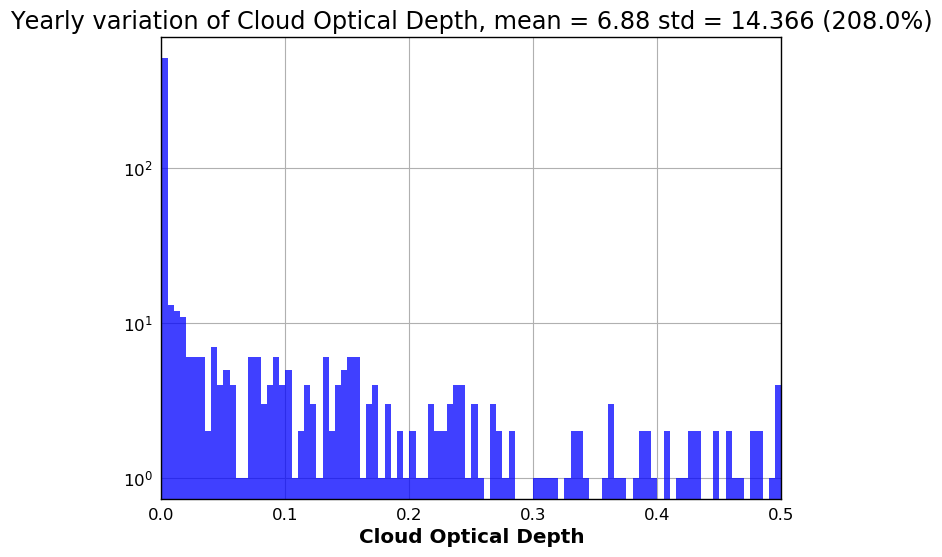

In [27]:
n, bins, patches = plt.hist(exct_rad_year, 100, range=[0,0.5],normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlim(0.,0.5)
plt.yscale('log', nonposy='clip')
plt.xlabel('Cloud Optical Depth')
plt.savefig('HistoTauTot2017_year.pdf')